In [4]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../..')))
import networkx as nx
import matplotlib.pyplot as plt 
import time
import gc
import pandas as pd
import numpy as np
from ranking import *

In [5]:
def measure_pagerank_time(data, user_id_column,
                          movie_id_column, rating_column,
                          pers=1, count_measure=3, directional = False):
    """
    Измеряет время выполнения создания объекта PageRank и время вычисления 
    PageRank для заданных данных, уменьшая влияние сборщика мусора.

    Args:
        data: DataFrame с данными рекомендаций.
        user_id_column: Название столбца с ID пользователей.
        movie_id_column: Название столбца с ID фильмов.
        rating_column: Название столбца с рейтингом.
        pers: Параметр pers для PagerankFactory.
        count_measure: Количество измерений (для усреднения).

    Returns:
        Tuple: Время создания объекта PageRank (в секундах), 
               время выполнения get_pagerank (в секундах).
    """
    gc.collect()

    # Измеряем время создания объекта
    start_time_creation = time.time()
    pg = PagerankFactory().read_pd(data, user_id_column, movie_id_column, rating_column, pers, directional)
    end_time_creation = time.time()
    creation_time = end_time_creation - start_time_creation

    # Измеряем время выполнения get_pagerank
    start_time_calculation = time.time()
    for _ in range(count_measure):
        _ = pg.get_pagerank()
    end_time_calculation = time.time()
    execution_time = (end_time_calculation - start_time_calculation) / count_measure

    return creation_time, execution_time

def measure_hits_time(data, user_id_column,
                          movie_id_column, rating_column,
                          pers=1, count_measure=3, directional = False):
    gc.collect()

    # Измеряем время создания объекта
    start_time_creation = time.time()
    pg = HITSFactory().read_pd(data, user_id_column, movie_id_column, rating_column, pers, directional)
    end_time_creation = time.time()
    creation_time = end_time_creation - start_time_creation

    # Измеряем время выполнения get_pagerank
    start_time_calculation = time.time()
    for _ in range(count_measure):
        _ = pg.get_rank()
    end_time_calculation = time.time()
    execution_time = (end_time_calculation - start_time_calculation) / count_measure

    return creation_time, execution_time

def plot_time(filename):
    """
    Строит график зависимости времени выполнения  от размера выборки.

    Args:
        filename: Имя файла CSV с данными о времени выполнения.
    """
    df = pd.read_csv(filename)

    # Строим график
    plt.plot(df['Размер выборки'], df['Время выполнения'], marker='o')

    # Настраиваем оси и заголовок графика
    plt.xlabel('Доля набора данных')
    plt.ylabel('Время выполнения (секунды)')
    plt.title('Зависимость времени выполнения  от размера выборки')
    plt.grid()

    # Отображаем график
    plt.show()


In [6]:
df = pd.read_csv("./../../res/movie/rating.csv")

In [ ]:
# Создаем список для хранения данных о времени выполнения
results = []

# Пример использования:
for i in np.arange(0.1, 1 + 0.1, 0.1):
    data = df.sample(frac=i)
    creation_time, execution_time = measure_hits_time(data, 'userId', 'movieId', 'rating', count_measure=8)
    print(f"Время создания: {creation_time:.4f} секунд")
    print(f"Время выполнения: {execution_time:.4f} секунд")
    print(f"Размер {i}")
    results.append([i, execution_time, creation_time])

# Создаем DataFrame из полученных данных
results_df = pd.DataFrame(results, columns=['Размер выборки', 'Время выполнения', 'Время создания'])

# Сохраняем DataFrame в файл CSV
results_df.to_csv('./hits/my_py_hits_results_movielens.csv', index=False)
plot_time('./hits/my_py_hits_results_movielens.csv')

C:\Users\odo20\AppData\Roaming\Python\Python312\site-packages\scipy\sparse\_base.py:713: RuntimeWarning: divide by zero encountered in divide
  recip = np.true_divide(1., other)
100%|██████████| 100/100 [00:04<00:00, 20.32it/s]


Время создания: 2.0405 секунд
Время выполнения: 5.1730 секунд
Размер 0.1


100%|██████████| 100/100 [00:09<00:00, 10.83it/s]


Время создания: 3.8023 секунд
Время выполнения: 9.5650 секунд
Размер 0.2


100%|██████████| 100/100 [00:13<00:00,  7.24it/s]


Время создания: 5.6447 секунд
Время выполнения: 14.1161 секунд
Размер 0.30000000000000004


100%|██████████| 100/100 [00:18<00:00,  5.55it/s]


Время создания: 8.2181 секунд
Время выполнения: 18.6636 секунд
Размер 0.4


100%|██████████| 100/100 [00:23<00:00,  4.29it/s]


Время создания: 8.7815 секунд
Время выполнения: 23.0749 секунд
Размер 0.5


100%|██████████| 100/100 [00:27<00:00,  3.64it/s]


Время создания: 10.9086 секунд
Время выполнения: 28.1913 секунд
Размер 0.6


100%|██████████| 100/100 [00:32<00:00,  3.11it/s]


Время создания: 12.6422 секунд
Время выполнения: 32.4452 секунд
Размер 0.7000000000000001


100%|██████████| 100/100 [00:36<00:00,  2.72it/s]


Время создания: 14.6152 секунд
Время выполнения: 37.3861 секунд
Размер 0.8


100%|██████████| 100/100 [00:41<00:00,  2.42it/s]


Время создания: 18.7455 секунд
Время выполнения: 42.9055 секунд
Размер 0.9


100%|██████████| 100/100 [00:46<00:00,  2.14it/s]


Время создания: 18.9115 секунд
Время выполнения: 47.6673 секунд
Размер 1.0


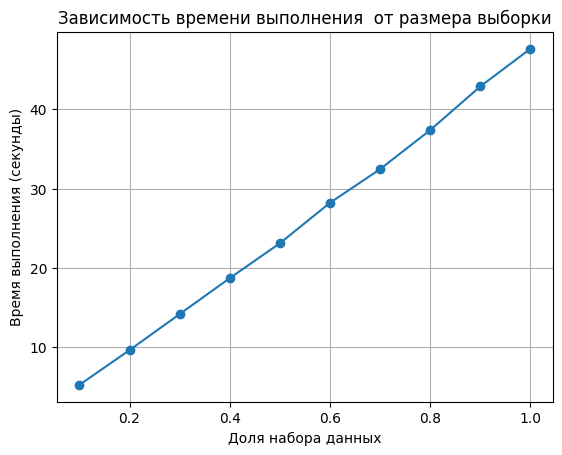

In [7]:
# Создаем список для хранения данных о времени выполнения
results = []

# Пример использования:
for i in np.arange(0.1, 1 + 0.1, 0.1):
    data = df.sample(frac=i)
    creation_time, execution_time = measure_pagerank_time(data, 'userId', 'movieId', 'rating', count_measure=3)
    print(f"Время создания: {creation_time:.4f} секунд")
    print(f"Время выполнения: {execution_time:.4f} секунд")
    print(f"Размер {i}")
    results.append([i, execution_time, creation_time])

# Создаем DataFrame из полученных данных
results_df = pd.DataFrame(results, columns=['Размер выборки', 'Время выполнения', 'Время создания'])

# Сохраняем DataFrame в файл CSV
results_df.to_csv('./pagerank/my_py_pagerank_results_movielens.csv', index=False)
plot_time('./pagerank/my_py_pagerank_results_movielens.csv')

In [ ]:
filename = './../../res/google_graph/web-Google.txt'
skiprows = 0
with open(filename , 'r') as f:
    for line in f:
        if line[0] != "#":
            break
        skiprows += 1

data = pd.read_csv(filename , sep='\t', header=None,
                   skiprows=skiprows, dtype=int,
                   names=['source', 'target'])
data['edge_attr'] = 1


In [ ]:

# Создаем список для хранения данных о времени выполнения
results = []

# Пример использования:
for i in np.arange(0.1, 1 + 0.1, 0.1):
    data_slice = data.sample(frac=i)
    creation_time, execution_time = measure_hits_time(data_slice, 'source', 'target', 'edge_attr',data_slice['source'].min(), 3, False)
    print(f"Время создания: {creation_time:.4f} секунд")
    print(f"Время выполнения: {execution_time:.4f} секунд")
    print(f"Размер {i}")
    results.append([i, execution_time, creation_time])

# Создаем DataFrame из полученных данных
results_df = pd.DataFrame(results, columns=['Размер выборки', 'Время выполнения', 'Время создания'])

# Сохраняем DataFrame в файл CSV
results_df.to_csv('./hits/my_py_hits_results_web.csv', index=False)
plot_time('./hits/my_py_hits_results_web.csv')

In [ ]:
# Создаем список для хранения данных о времени выполнения
results = []

# Пример использования:
for i in np.arange(0.1, 1 + 0.1, 0.1):
    data_slice = data.sample(frac=i)
    creation_time, execution_time = measure_pagerank_time(data_slice, 'source', 'target', 'edge_attr', data_slice['source'].min(), 3, True)
    print(f"Время создания: {creation_time:.4f} секунд")
    print(f"Время выполнения: {execution_time:.4f} секунд")
    print(f"Размер {i}")
    results.append([i, execution_time, creation_time])

# Создаем DataFrame из полученных данных
results_df = pd.DataFrame(results, columns=['Размер выборки', 'Время выполнения', 'Время создания'])

# Сохраняем DataFrame в файл CSV
results_df.to_csv('./pagerank/my_py_pagerank_results_web.csv', index=False)
plot_time('./pagerank/my_py_pagerank_results_web.csv')